In [1]:
from altaipony.lcio import from_mast
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.6f' % x)
%matplotlib inline

In [2]:
df = pd.read_csv("C:\Vs_code_projects\mdwarf_flares\epic_catalogue.csv")

<>:1: DeprecationWarning: invalid escape sequence '\V'
<>:1: DeprecationWarning: invalid escape sequence '\V'
C:\Users\thoma\AppData\Local\Temp\ipykernel_28724\3456439302.py:1: DeprecationWarning: invalid escape sequence '\V'
  df = pd.read_csv("C:\Vs_code_projects\mdwarf_flares\epic_catalogue.csv")


In [3]:
df.loc[2455]

Unnamed: 0                         2455.000000
EPIC ID                       211487795.000000
Teff                               4037.284400
logg                                  4.597300
Flare #                               6.000000
Observation time                     74.800688
Average flare duration                0.125995
Longest flare duration                0.183885
Shortest flare duration               0.102158
Average percentage increase          32.761896
Highest percentage increase         144.555902
Lowest percentage increase            0.846720
Name: 2455, dtype: float64

In [4]:
flc = from_mast("211487795", mode="LC", mission="K2")

6% (211/3657) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).
6% (211/3657) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).


<Axes: xlabel='Time - 2454833 [BKJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

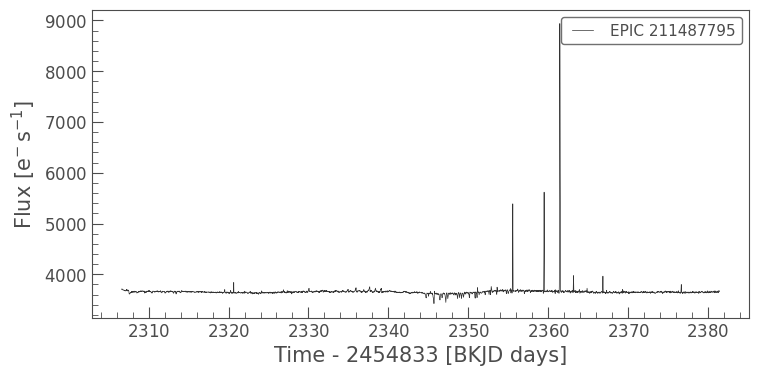

In [5]:
flc.plot()

In [6]:
flc = flc.detrend("savgol")

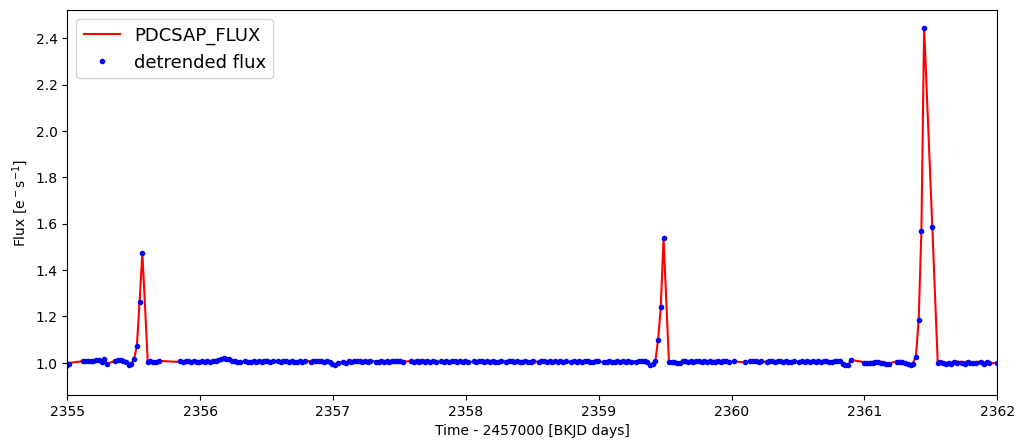

In [10]:
plt.figure(figsize=(12,5))
plt.plot(flc.time.value, flc.flux / np.nanmedian(flc.flux), "r", label="PDCSAP_FLUX")
plt.plot(flc.time.value, flc.detrended_flux / np.nanmedian(flc.detrended_flux), "b.", label="detrended flux")
plt.xlabel("Time - 2457000 [BKJD days]")
plt.ylabel(r"Flux [e$^-$s$^{-1}$]")
plt.xlim(2355, 2362)
#plt.ylim(.95,1.25)
plt.legend(loc=2,fontsize=13);

In [9]:
test.flares

,istart,istop,cstart,cstop,tstart,tstop,ed_rec,ed_rec_err,ampl_rec,dur,total_n_valid_data_points
0,1082,1086,108697,108702,2330.004947,2330.107105,104.05803059499783,4.838033056220142,0.016945481300354004,0.102159,3379.000000
1,1313,1317,108937,108942,2334.908552,2335.010711,63.15065258749031,4.907924075356842,0.00846719741821289,0.102158,3379.000000
2,1495,1503,109137,109146,2338.994885,2339.178770,242.60482514660464,6.1722081335903995,0.019871950149536133,0.183885,3379.000000
3,2224,2228,109945,109950,2355.503657,2355.605815,2206.485070692467,4.245160962049474,0.4619414806365967,0.102158,3379.000000
4,2247,2252,109976,109981,2356.137038,2356.239197,84.42480777009145,4.354028275541107,0.012928605079650879,0.102158,3379.000000
5,2476,2481,110233,110241,2361.387981,2361.551435,11110.630370087449,5.460309186364569,1.445559024810791,0.163454,3379.000000


In [8]:
test = flc.find_flares(N1 = 3, N2 = 3, N3 = 4)

Found 2 candidate(s) in the (0,1467) gap.
Found 1 candidate(s) in the (1467,2061) gap.
Found 0 candidate(s) in the (2061,2207) gap.
Found 1 candidate(s) in the (2207,2233) gap.
Found 1 candidate(s) in the (2233,2459) gap.
Found 1 candidate(s) in the (2459,3379) gap.
C:\Users\thoma\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\altaipony\altai.py:210: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  lc.flares = pd.concat([lc.flares, new], ignore_index=True)
